# **DEEP LEARNING**

# Step-1 : Import Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Step-2 : Data Collection

In [65]:
# Load the data

df = pd.read_csv('mnist.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step-3 : Data Preprocessing

In [66]:
# Split the data into features and targets

features = df.drop('label', axis=1)
targets = df['label']

In [67]:
# Normalize the features

features = features / 255.0
features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Convert the features and targets into numpy arrays

features = np.array(features)
targets = np.array(targets)

In [69]:
# Reshape the features into 28x28 images

features = features.reshape(-1, 28, 28)
targets = targets.reshape(-1)

features.shape, targets.shape

((42000, 28, 28), (42000,))

# Step-4 : Model Development - ANN Model

In [70]:
# Model definition

model = keras.Sequential([
                            keras.layers.Flatten(input_shape=(28, 28)),
                            keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(10, activation='softmax')
                        ])

c:\BIA\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
# Model compilation

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step-5 : Model Training

In [72]:
# Fit the model for 5 epochs

model.fit(features, targets, epochs=5)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8305 - loss: 0.5669
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9464 - loss: 0.1777
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1190
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9711 - loss: 0.0951
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9757 - loss: 0.0772


# Step-6 : Model Evaluation

In [73]:
# Make predictions on the first 5 images

predictions = model.predict(features)
predictions

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1.1573726e-09, 9.9928004e-01, 2.9333309e-05, ..., 2.7102809e-07,
        6.3539972e-04, 1.6617863e-08],
       [9.9999845e-01, 2.4432070e-10, 2.1395019e-07, ..., 1.1812134e-06,
        2.5893503e-11, 4.4043212e-08],
       [1.1603010e-09, 9.9984217e-01, 6.4963647e-06, ..., 3.2904696e-05,
        9.3255279e-05, 2.5154061e-06],
       ...,
       [8.2541725e-09, 1.2204564e-14, 4.5538705e-08, ..., 9.9998653e-01,
        3.8283709e-08, 1.2162477e-05],
       [4.1413077e-06, 3.7320337e-08, 5.0863298e-07, ..., 5.7518793e-08,
        4.8669835e-10, 1.1393348e-09],
       [8.5937054e-06, 2.1046424e-05, 4.6102903e-03, ..., 3.6979638e-02,
        4.2094686e-03, 9.4730455e-01]], dtype=float32)

# Step-7 : Model Visualization

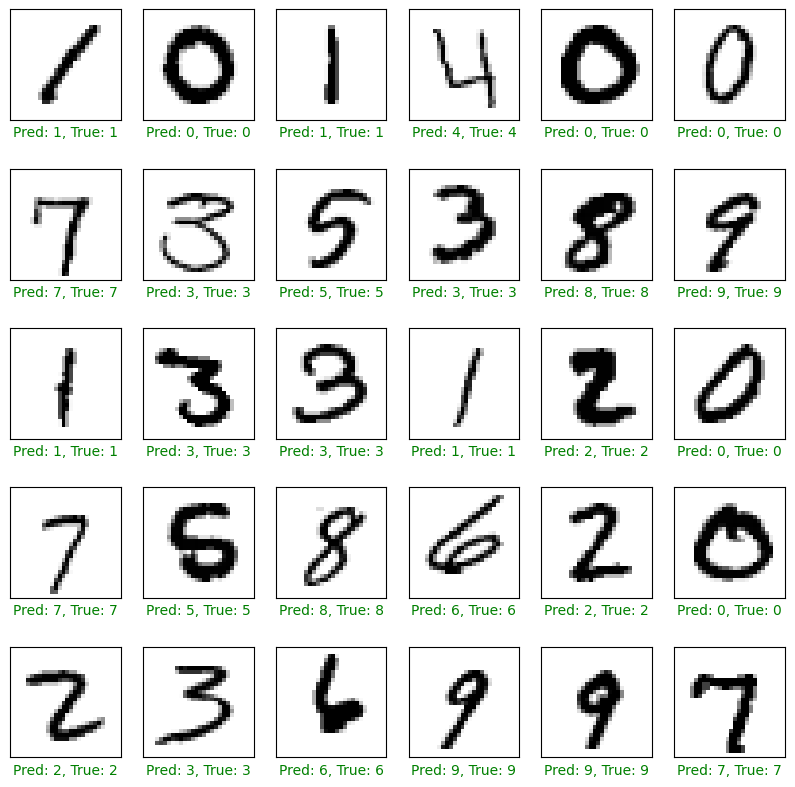

In [74]:
# Plot the first 30 images with their predictions

plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_target = np.argmax(predictions[i])
    true_target = targets[i]
    if predicted_target == true_target:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_target}, True: {true_target}", color=color)
plt.show()